In [107]:
%config IPCompleter.greedy=True
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [144]:
import pandas as pd
import numpy as np

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

# Data

## Description

In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Observations

* 10 attributes
* 1 categorical attribute
* total_bedrooms have a few null values

## Histogram Analysis

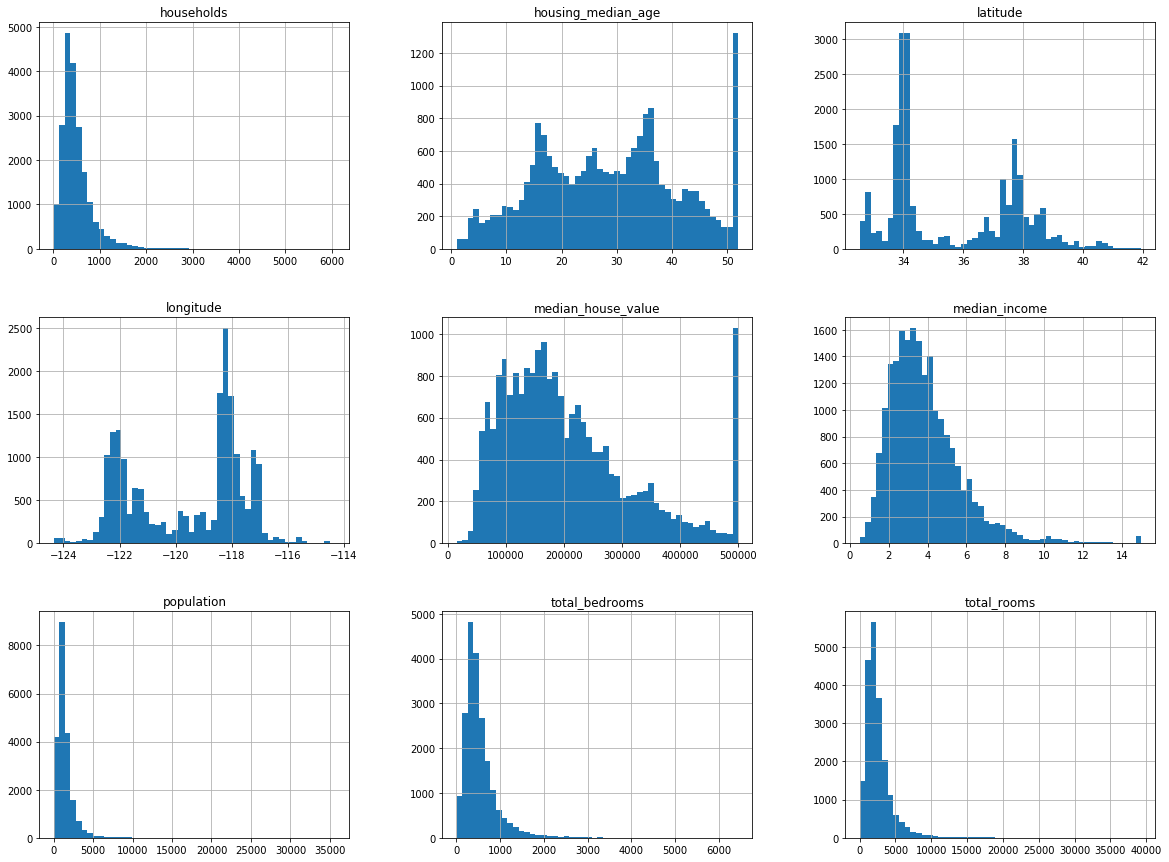

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

### Observations

* From the graphs we see that the histograms are `tail-heavy`. They extends farther to the right than to the left. Having more bell-shaped histograms make it easier for ML algorithms to detect patterns
* The attributes have different scales. Some ML algorithms work best if all the attributes have the same scale

# Sampling

## Random Sampling

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

In [29]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

The above divides the dataset into training and test sets randomly. This may not be the best approach as the dataset is not large and we would like that the training and test both contain samples covering all the variations in the data

## Stratified Sampling

Since median income is very important in predicing medain housing prices, we need to ensure that the test set is representative of the various categories of incomes in the whole dataset. Looking at the median income histogram above, we add a new feature to the data containing the income category

In [32]:
housing['income_cat'] = pd.cut(housing['median_income']
                               ,bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf]
                               ,labels=[1, 2, 3, 4, 5])

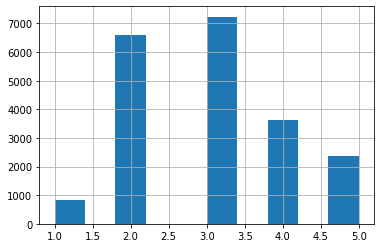

In [41]:
_ = housing['income_cat'].hist()

This new attribute categorizes the dataset into different income categories. Now we want to divide the dataset in to training and testing sets such that the income distribution in both of the sets remain the same.

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [65]:
print('income_cat distribution in the dataset:\n', housing['income_cat'].value_counts() / len(housing))

income_cat distribution in the dataset:
 3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [66]:
print('income_cat distribution in train split:\n', strat_train_set['income_cat'].value_counts() / len(strat_train_set))
print()
print('income_cat distribution in test split:\n', strat_test_set['income_cat'].value_counts() / len(strat_test_set))

income_cat distribution in train split:
 3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

income_cat distribution in test split:
 3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


## Comparison

Let's try the train_test_split again to see what was the income_cat distribution like in our first sampling

In [75]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print('income_cat distribution in train split:\n', train_set['income_cat'].value_counts() / len(train_set))
print()
print('income_cat distribution in test split:\n', test_set['income_cat'].value_counts() / len(test_set))

income_cat distribution in train split:
 3    0.348595
2    0.317466
4    0.178537
5    0.115673
1    0.039729
Name: income_cat, dtype: float64

income_cat distribution in test split:
 3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64


We can see that the difference is distribution for random sampling is larger than the difference in distribution for stratified sampling. Thus it is better to use stratified sampling. Let's now remove the income_cat attribute from the data

In [77]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

# Data Exploration

Now, we put aside the test set (since we are not supposed know anything about it) and explore the training set

In [83]:
housing = strat_train_set.copy()

## Visualization 

### Geographical Information

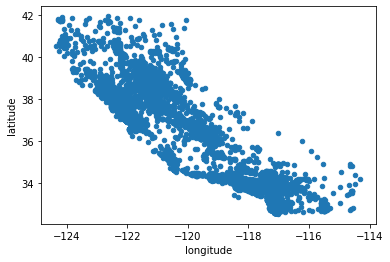

In [85]:
_ = housing.plot(kind='scatter', x='longitude', y='latitude')

Doesn't seem like there is any pattern here. Let's try to see regions of high density

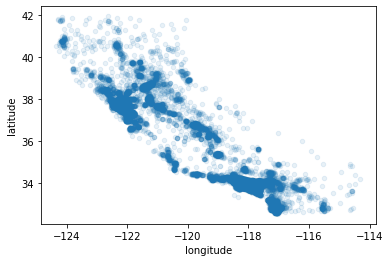

In [86]:
_ = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

Now we can see places of high density. Let's try to incorporate median house value and population in the visualization

_ = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10, 7),
                 s=housing['population']/100.0, label='population',
                 c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

Now we can see that the housing prices are related to the location and the population

## Correlation

In [106]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

We can see that the median housing price correlated the most with the median income. Hence, it increases with the median income. On the other hand, the housing price decreases the most with increasing latitude (going up North). Let's visualize this as well

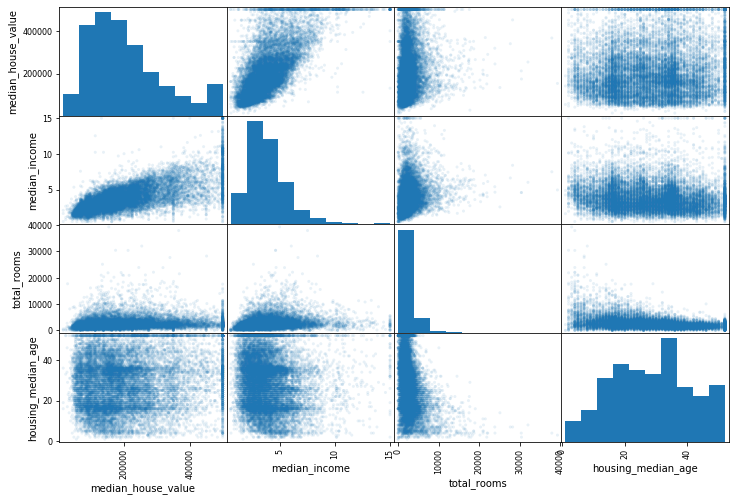

In [110]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
_ = scatter_matrix(housing[attributes], figsize=(12, 8), alpha=0.1)

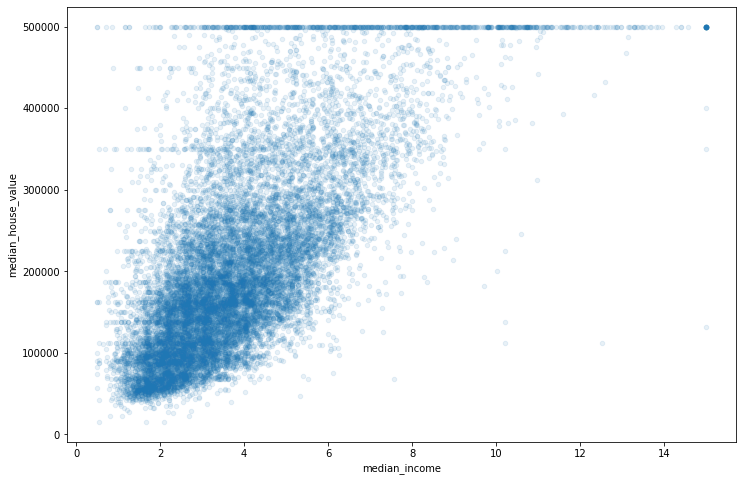

In [113]:
_ = housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(12, 8), alpha=0.1)

The median income attribute indeed seems to be the most promising to predict the housing value. The housing value increases with the median income without excessive spread. There also seems to be a price cap at $500K indicated by a horiziontal line.
There also seems to be a few more less visible horizontal lines around 450K, 350K, 280K and some more. It will be better to remove the corresponding districts to prevent overfitting.

## Additional Attributes
Let's try to calculate some additional attributes and see how they correlation with the housing value

In [117]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

The number of rooms per household is more correlated to the housing value than the total number of rooms. Also the number of bedrooms per room is also much more correlated than the total number of rooms.

## Summary
* Median income is the best attribute to predict median housing value
* Increasing latitude decreases the median housing value
* Other important attributes
    * rooms per household
    * bedrooms_pepr_room
* Housing price cap at \$500K
* More quirks around at housing prices around 450K. 350K, 280K, and a few more. These should be cleaned
* Histograms for some attributes are tail-heavy
* Attributes have different scales

# Data Preparation

Let's start again with the clean training data and separate the target value, median house value, from the attributes

In [118]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

## Cleaning

### Missing Values

First we take care of missing values. As we discovered that the attribute `total_bedrooms` has a few missing values

In [120]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

Median can only be computed on numerical attributes, so we have to get rid of the `ocean_proximity` attribute for a while

In [121]:
housing_num = housing.drop('ocean_proximity', axis=1)

The imputer simply calculates the medians. It is trained so that it can be applied to new data as well

In [122]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [125]:
print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


Now we use the imputer to replace the missing values with the learned medians

In [129]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [131]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [130]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


### Categorical Attributes

In [136]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


ML algorithms prefer to work with numbers. So we need to convert these to numbers

In [139]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [140]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

ML algorithms assume two nearby values to be more similar than two distant values. This is not the case for the `ocean_proximity` attribute. We can fix this by creating one binary attribute per category

In [141]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot= cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [142]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

If there are a large number of possible categories, one-hot encoding will result in a large number of features. In that case, one can replace the categorical features with useful numerical features relating to the categories. Another technique called `Embedding` is also used

## Feature Scaling

There are two way to scale the features:
* Normalization
    * Use min and max of the feature
    * The feature is rescaled to values in the range 0-1
    * Affected by outliers since they can change the min and max
* Standardization
    * Uses mean and standard deviation of the feature
    * The features has a 0 mean and unit variance
    * The feature is not bound to a range
    * May be a problem for some algorithms that expect values in the range \[0, 1\]
    * Not much affect by outliers

## Transformation Pipeline
We can use scikit Pipeline to make a sequence of all transformations

### Attributes Adder
First we need a custom transformer to add the new attributes we calculated above to the dataset

In [145]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

### Numerical Pipeline
First we make the pipeline to process the numerical attributes

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [150]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

###  Full Pipeline
Now we make a pipeline that transforms numerical as well as categorical attributes

In [204]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

# Model

## Training

In [205]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The model is trained now. Let's try a few instances from the training set

In [212]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Let's measure the model's RMSE

In [213]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

The prediction error of $68K is not very satisfying. The model is underfitting the training data. The reason can be either
1. The features do not provide enough information to make good predictions. Or,
1. The model is not powerful enough

Let's try with a more compelx model.
Let's train a decision tree

In [215]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

An error of 0 for the decision tree implies either
1. The model is perfect. Or,
1. The model badly overfits the data

To evaluate the model, we can use K-fold cross-validation based training.

In [217]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())
    
display_scores(tree_rmse_scores)

Scores: [67434.21078308 66380.34924784 70250.17877103 68951.64209229
 71122.03599816 76037.5074884  68594.0221337  70805.54945227
 77095.24840973 70026.75547286]
Mean: 70669.74998493647
Standard Deviation: 3271.705215260083


From the above scores, the decision tree seems doesn't seem to perform any better than linear regression. Let's evaluate the linear regression model with cross-validation as well

In [218]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.6740017983493


Thus, the decision tree is badly overfitting the data. It even performs worse than the linear regressions model

Let's try a random forest regressor

In [222]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18613.81520644663

In [223]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [49752.54218959 47454.690807   49996.59889533 52550.82485018
 49308.90150956 53534.23271653 48607.02863296 47811.95197204
 52868.5079949  50184.25068341]
Mean: 50206.95302515128
Standard Deviation: 2014.370510726567


The forest regressor seems to perform much better than the linear regressor on the training set as evident from the RMS error.
The mean error on the validation set is also lower but is still very high meaning that the forest regressor is still overfitting the data

To save a model:

import joblib

joblib.dump(forest_reg, 'forest_reg.pkl')

To load a model:

forest_reg_loaded = joblib.load('forest_reg.pkl')

## Fine-Tuning

Let's use Grid Search to fine-tune our model

In [225]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [226]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [227]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [232]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64156.78675757018 {'max_features': 2, 'n_estimators': 3}
56171.13857646959 {'max_features': 2, 'n_estimators': 10}
52940.92719147767 {'max_features': 2, 'n_estimators': 30}
59968.134987988 {'max_features': 4, 'n_estimators': 3}
52764.818352876355 {'max_features': 4, 'n_estimators': 10}
50648.64345226487 {'max_features': 4, 'n_estimators': 30}
60062.01965587763 {'max_features': 6, 'n_estimators': 3}
52045.378788757516 {'max_features': 6, 'n_estimators': 10}
50154.37418313381 {'max_features': 6, 'n_estimators': 30}
58957.66505051465 {'max_features': 8, 'n_estimators': 3}
52306.44656674432 {'max_features': 8, 'n_estimators': 10}
50374.55056545073 {'max_features': 8, 'n_estimators': 30}
62061.21112920866 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54478.35850593846 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59483.1584932861 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52430.76571806288 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

Let's look at what features are actually considered important by the model

In [233]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.86277529e-02, 6.35125488e-02, 4.19107929e-02, 1.72086905e-02,
       1.63150879e-02, 1.76616800e-02, 1.62299609e-02, 3.16970194e-01,
       5.83436325e-02, 1.07756220e-01, 8.09955751e-02, 1.14889862e-02,
       1.65062758e-01, 5.06238877e-05, 3.36794884e-03, 4.49754682e-03])

In [235]:
extra_attribs = ['room_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31697019436862545, 'median_income'),
 (0.16506275817678723, 'INLAND'),
 (0.10775622030933135, 'pop_per_hhold'),
 (0.08099557514597792, 'bedrooms_per_room'),
 (0.07862775287472375, 'longitude'),
 (0.06351254876633988, 'latitude'),
 (0.05834363246196812, 'room_per_hhold'),
 (0.04191079293463843, 'housing_median_age'),
 (0.017661679973972274, 'population'),
 (0.017208690472307598, 'total_rooms'),
 (0.01631508791234495, 'total_bedrooms'),
 (0.016229960874411337, 'households'),
 (0.011488986187214077, '<1H OCEAN'),
 (0.004497546817541942, 'NEAR OCEAN'),
 (0.0033679488361259666, 'NEAR BAY'),
 (5.062388768962109e-05, 'ISLAND')]

### Evaluation on Test Set

In [238]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47936.111039806965

To find out how precise the model is, we can compute the 95% confidence interval for the error

In [239]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45949.15431963, 49843.9234065 ])